# Mergers and Acquisitions by Tech Companies EDA

In [9]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [10]:
df=pd.read_csv(r'C:\Users\priya\Downloads\acquisitions_update_2021.csv')

# Top Analysis to be done on the dataset
#### Have the number of acquisitions increased over the years?
#### Which companies have the highest number of acquisitions?
#### What are the top 10 businesses to acquire?
#### What is the trend of the Acquisition Price?
#### What were the most expensive companies to acquire?
#### Where are the acquisitions of companies concentrated?
#### What is the rate of acquisition of each parent company?
#### Which products were derived from a high number of company acquisitions?
#### What is the average spend of each parent company during its acquisitions?
#### Which months had the highest number of acquisitions?

In [17]:
df['Acquisition Price'][df['Acquisition Price']=='-']='Unknown'
df['Category'][df['Category']=='-']='Unknown'
df['Country'][df['Country']=='-']='Unknown'
df['Derived Products'][df['Derived Products']=='-']='Unknown'
df['Acquisition Year'][df['Acquisition Year']=='-']='Unknown'
df['Acquisition Month'][df['Acquisition Month']=='-']='Unknown'

In [18]:
df_ac_year=df.groupby('Acquisition Year').sum().reset_index()
df_ac_year=df_ac_year[df_ac_year['Acquisition Year']!='Unknown']

## Have the number of acquisitions increased over the years?

Text(0.5, 1.0, 'Acquisitions Trend over the years')

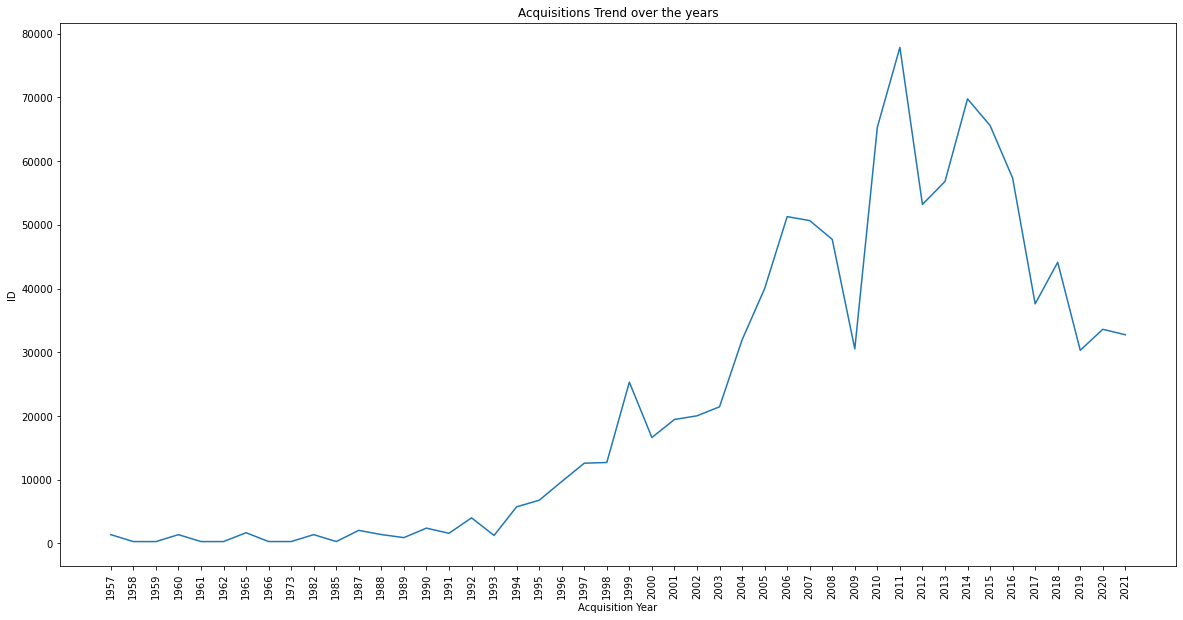

In [19]:
fig=plt.figure(figsize=(20,10),)
plt.xticks(rotation=90)
a=sns.lineplot(data=df_ac_year,x='Acquisition Year',y='ID')
a.set_title('Acquisitions Trend over the years')

## Which companies have the highest number of acquisitions?

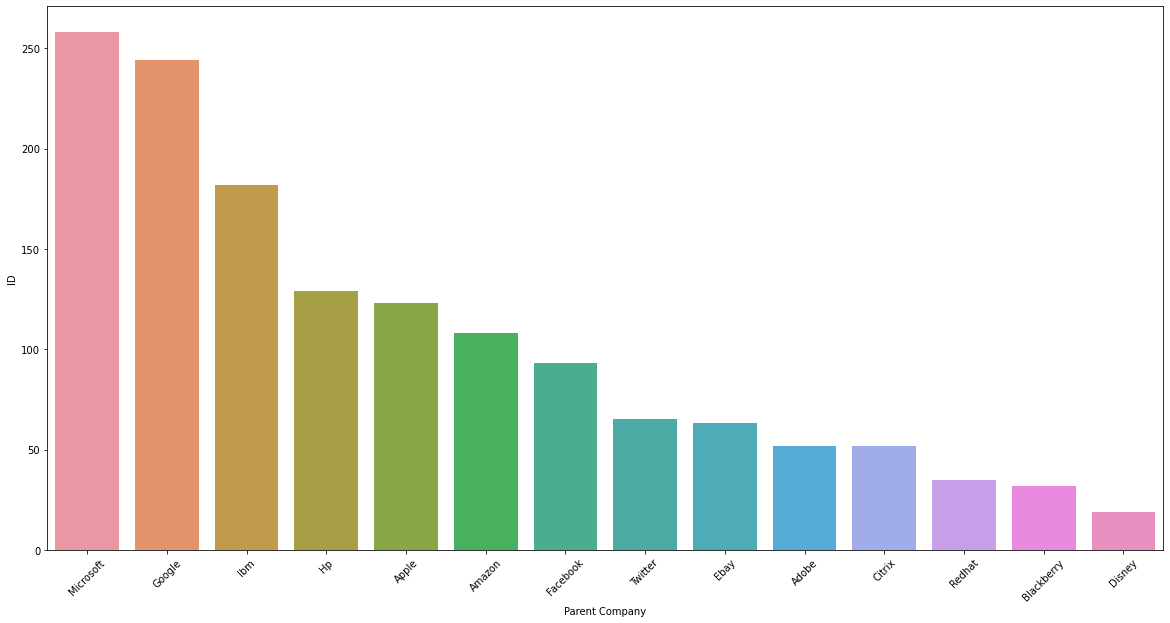

In [22]:
df8=df.groupby('Parent Company').count()['ID'].sort_values(ascending=False).reset_index()
fig1=plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
sns.barplot(data=df8,x='Parent Company',y='ID');

## What are the top 10  businesses to acquire?

In [23]:
df['Business'][df['Business']=='Unkown']='Unknown'

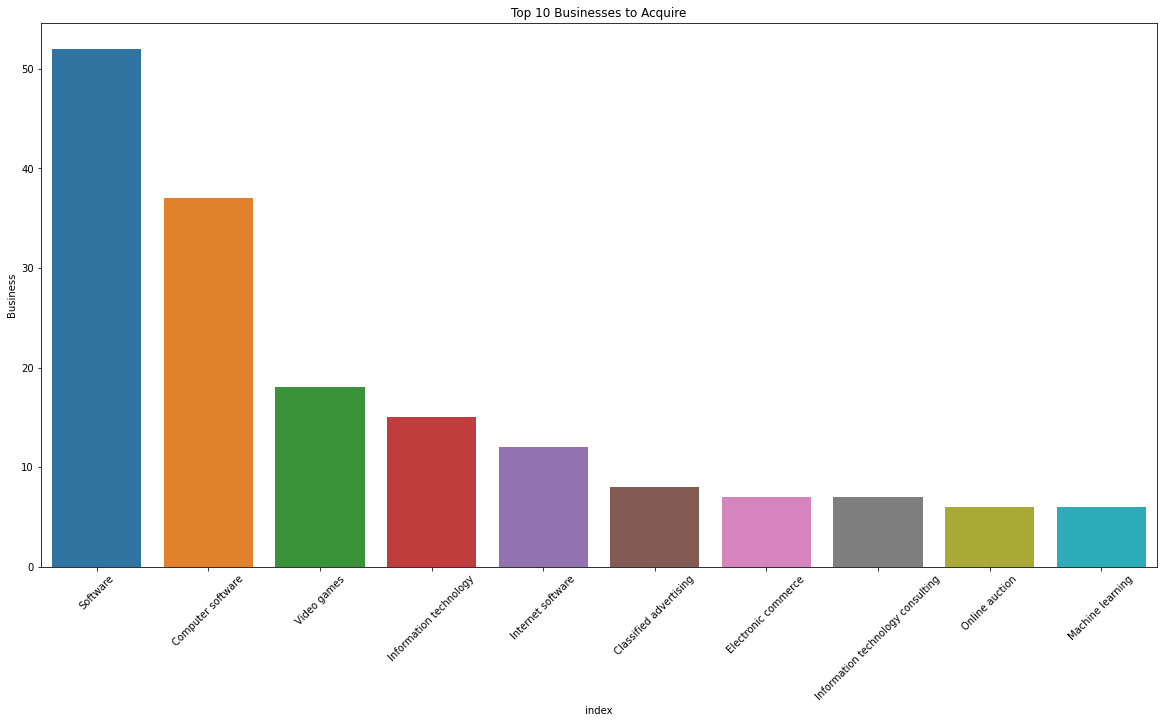

In [25]:
df9=df['Business'].value_counts().sort_values(ascending=False)[1:11].reset_index()
fig3=plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
plt.title('Top 10 Businesses to Acquire')
sns.barplot(data=df9,x='index',y='Business');

## What is the trend of the Acquisition Price ?

In [27]:
df['Acquisition Price'] = pd.to_numeric(df['Acquisition Price'], errors='coerce')

In [28]:
df_=df[df['Acquisition Price']!='Unknown']
df_=df_[df_['Acquisition Price']!='undisclosed']
df_['Acquisition Price']=df_['Acquisition Price'].dropna()
df_['Acquisition Price']=pd.to_numeric(df_['Acquisition Price'])

In [29]:
df_['Acquisition Price in Billions']=df_['Acquisition Price']/1000000

In [30]:
df_['Acquisition Price in Billions']=df_['Acquisition Price']/1000000

<AxesSubplot:title={'center':'Trend of Acqusition Price'}, xlabel='Acquisition Year', ylabel='Acquisition Price in Billions'>

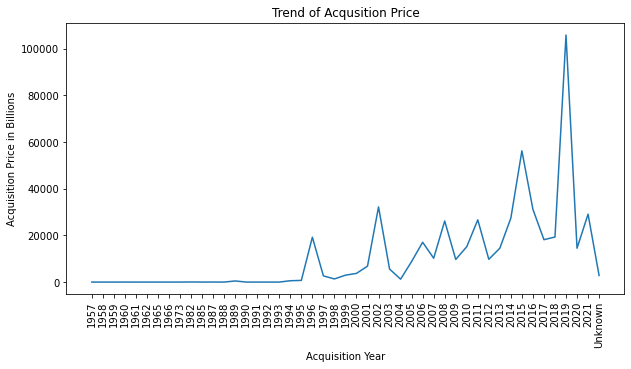

In [31]:
df10=df_.groupby('Acquisition Year')['Acquisition Price in Billions'].sum().reset_index()
fig5=plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plt.title('Trend of Acqusition Price')
sns.lineplot(data=df10,x='Acquisition Year',y='Acquisition Price in Billions')

## What were the most expensive companies to acquire?

In [19]:
df.dropna(inplace=True)

<AxesSubplot:title={'center':'Top 10 most companies to Acquire'}, xlabel='Acquired Company', ylabel='Acquisition Price'>

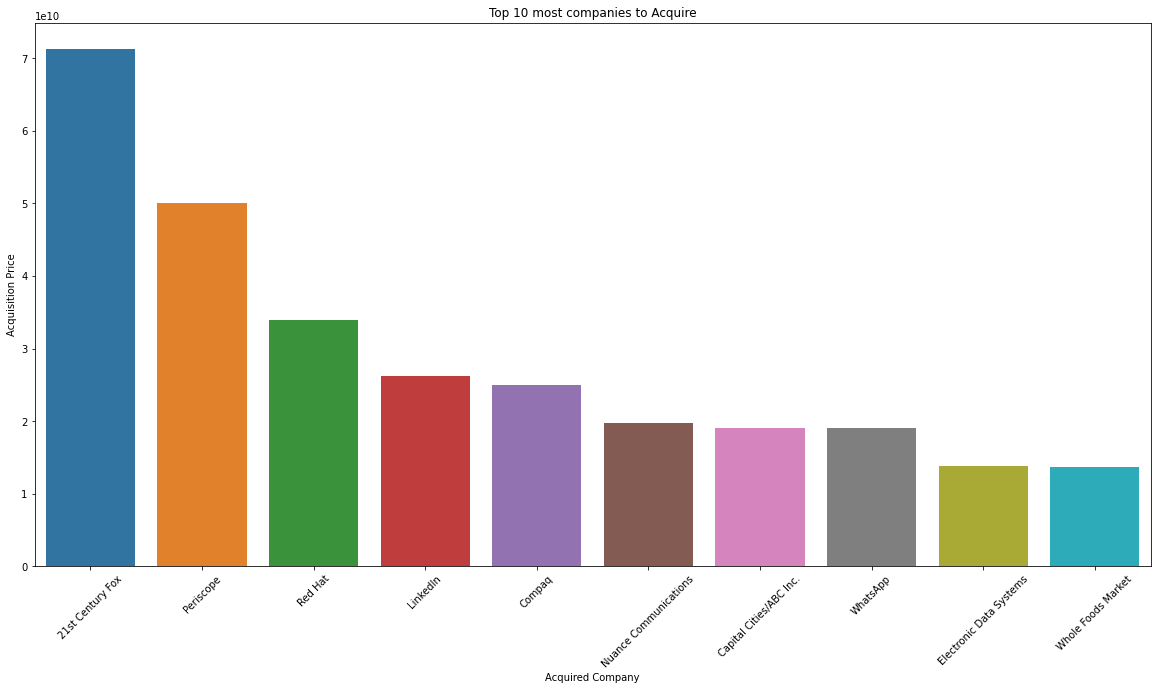

In [32]:
df11=df.groupby('Acquired Company')['Acquisition Price'].sum().sort_values(ascending=False)[:10].reset_index()
fig6=plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
plt.title('Top 10 most companies to Acquire')
sns.barplot(data=df11,x='Acquired Company',y='Acquisition Price')

## Where are the acquisitions of companies concentrated?

In [33]:
df_['Country'].replace({'Unknown':np.nan},inplace=True)

In [34]:
df_.dropna(inplace=True)

<AxesSubplot:xlabel='ID', ylabel='Country'>

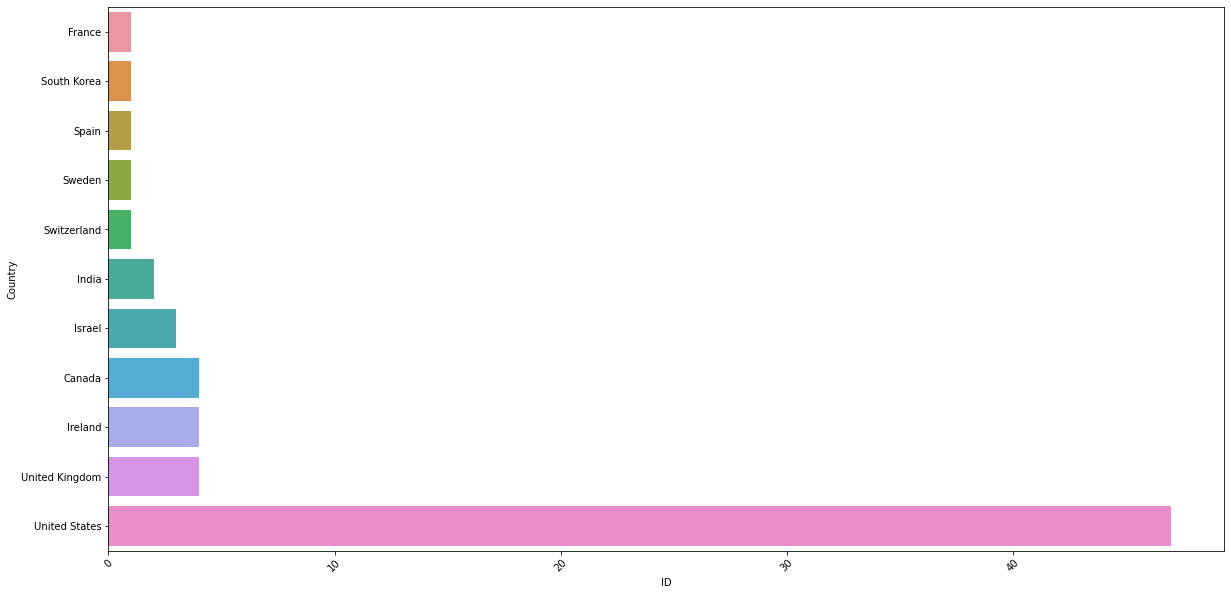

In [35]:
df12=df_.groupby('Country')['ID'].count().sort_values(ascending=True).reset_index()
fig7=plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
sns.barplot(data=df12,y='Country',x='ID')

## What is the rate of acquisition of each parent company?

In [36]:
rate_year = df.groupby(['Parent Company', 'Acquisition Year']).count()
rate_year = rate_year.reset_index()
# rate[0:26]
rate_year = rate_year.groupby(['Parent Company']).count()
rate = df.groupby(['Parent Company']).count()
tot_rate = pd.DataFrame({'years':rate_year['Acquisition Year'], 'acquired companies':rate['Acquired Company']})

In [37]:
tot_rate['Acquisition Rate']=tot_rate['acquired companies']/tot_rate['years']
tot_rate = tot_rate.sort_values(by='Acquisition Rate', ascending=False)

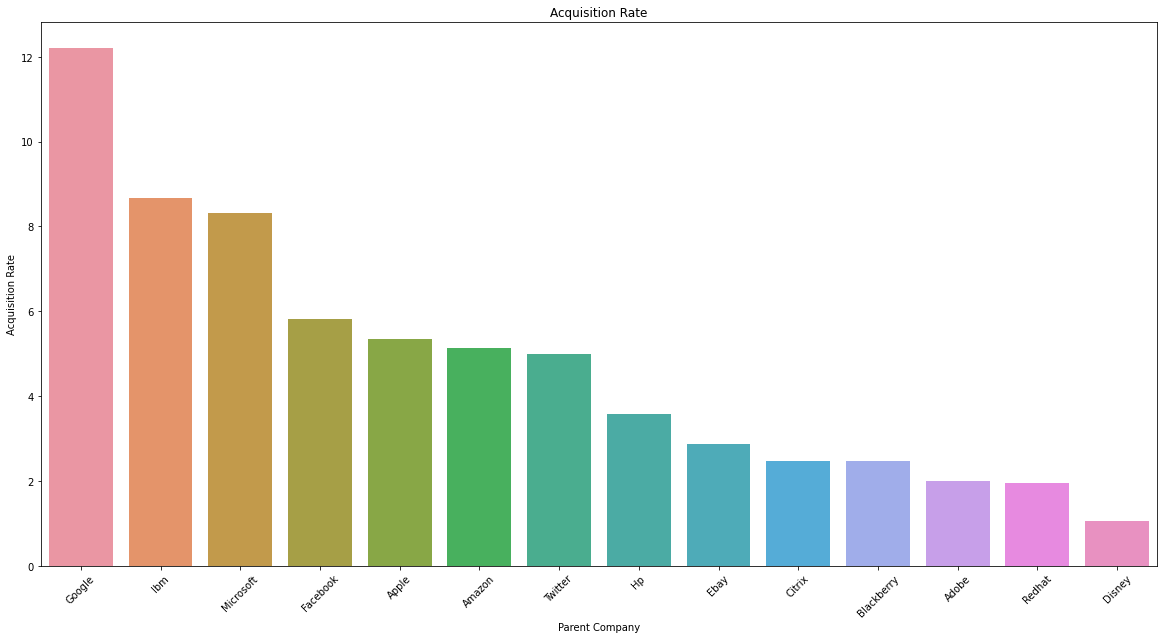

In [39]:
fig7=plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
plt.title('Acquisition Rate')
sns.barplot(data=tot_rate,x=tot_rate.index,y='Acquisition Rate');

## Which products were derived from a high number of company acquisitions?


In [40]:
df['Derived Products']=df['Derived Products'].replace({'Unknown':np.nan})

In [41]:
df['Derived Products'].dropna(inplace=True)

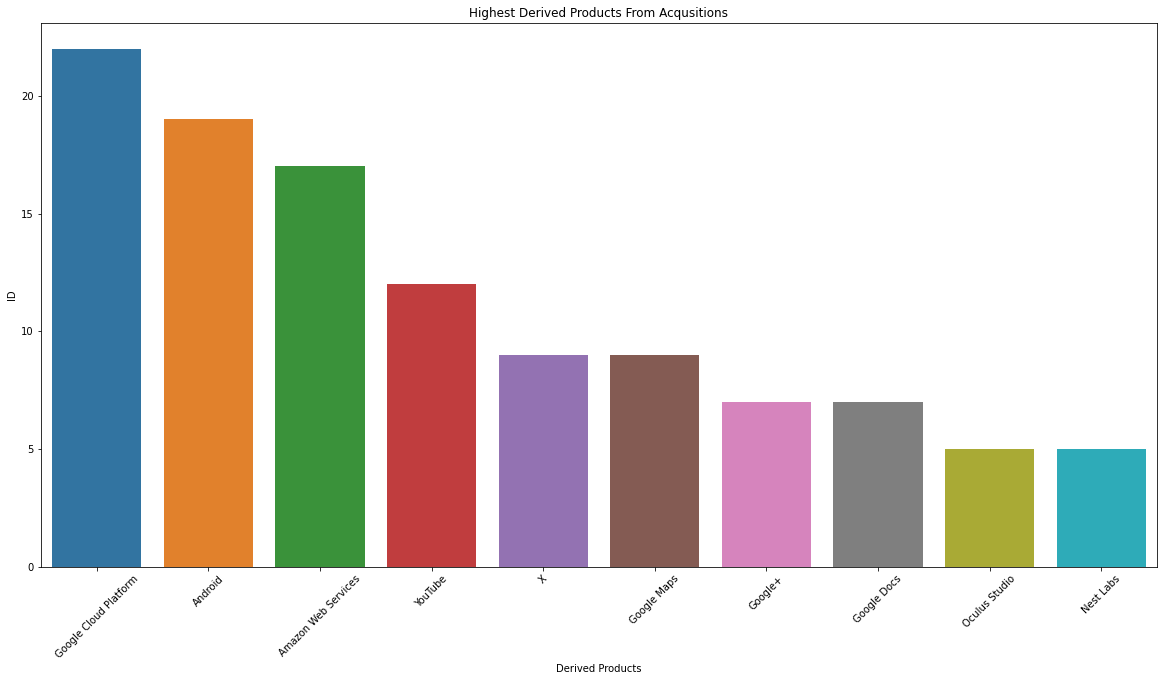

In [43]:
df14=df.groupby('Derived Products')['ID'].count().sort_values(ascending=False)[:10].reset_index()
fig8=plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
plt.title('Highest Derived Products From Acqusitions')
sns.barplot(data=df14,x='Derived Products',y='ID');

## What is the average spend of each parent company during its acquisitions?

In [44]:
df3=df.groupby('Parent Company')['Acquisition Price'].sum().reset_index()
df4=df.groupby('Parent Company')['Acquired Company'].count().reset_index()

In [45]:
df3['Acqusition Price in Billions']=df3['Acquisition Price']/10000000000

In [46]:
df4.head(2)

,Parent Company,Acquired Company
0,Adobe,52
1,Amazon,108


In [47]:
df3.head(2)

,Parent Company,Acquisition Price,Acqusition Price in Billions
0,Adobe,1.668274e+10,1.668274
1,Amazon,3.282580e+10,3.282580


In [48]:
df5=df3.merge(df4,left_on='Parent Company',right_on='Parent Company')

In [49]:
df5['Average Spend']=df5['Acqusition Price in Billions']*100/df5['Acquired Company']

In [50]:
df5=df5[['Parent Company','Average Spend']]
df5.sort_values(by='Average Spend',ascending=False,inplace=True)

<AxesSubplot:xlabel='Parent Company', ylabel='Average Spend'>

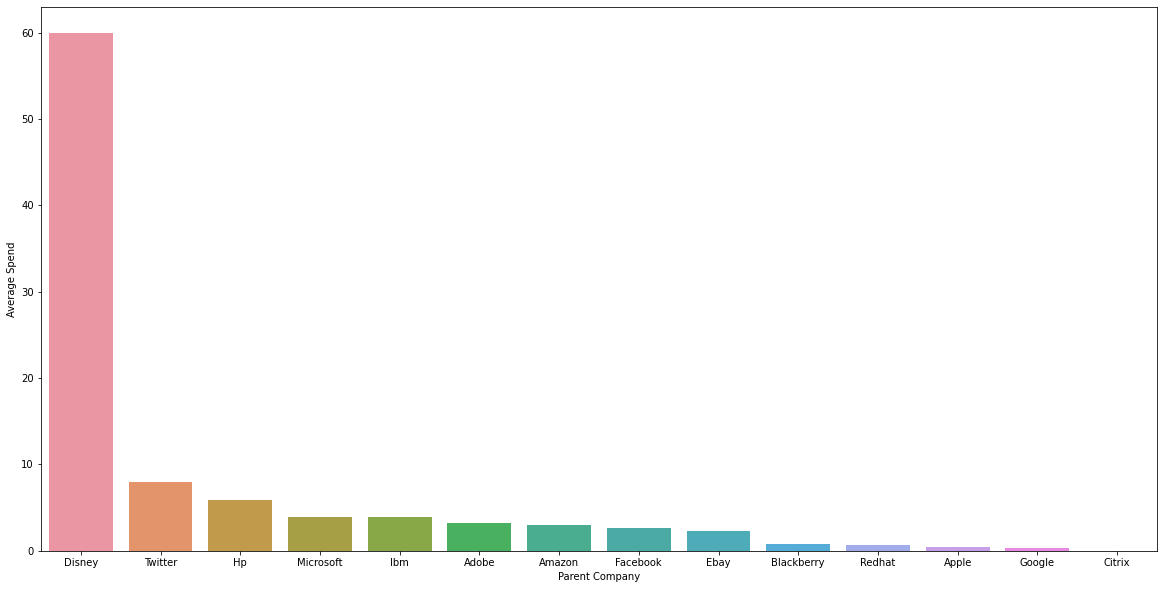

In [51]:
plt.figure(figsize=(20,10))
sns.barplot(data=df5,x='Parent Company',y='Average Spend')

## Which months had the highest number of acquisitions?

In [52]:
df6=df['Acquisition Month'].value_counts().reset_index()

In [53]:
df6=df6[df6['index']!='Unknown']
df6.sort_values(by='Acquisition Month',inplace=True)
df6

,index,Acquisition Month
11,Nov,94
10,Feb,98
9,Dec,105
8,Mar,106
7,Aug,114
6,Jan,115
5,Oct,119
4,Apr,122
2,Sep,125
3,May,125


<AxesSubplot:xlabel='index', ylabel='Acquisition Month'>

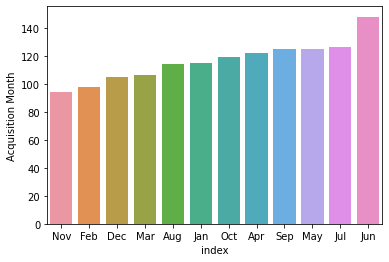

In [54]:
sns.barplot(data=df6,x='index',y='Acquisition Month')